# Predicting the Sale price of Bulldozers Using Machine Learning
In this model we are going to go through an example of machine learning learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem Definition 
> How well can we predict the future sale price of a bulldozer , given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2.Data
The data is downloaded from kaggle bluebook for bulldozers competition : 

The data for this competition is split into three parts:
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3.Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this projet check:

## 4.Features
Kaggle provides a data dictionary dealing all of the features of the dataset. You can view this data_dictionary on data folder of this project.

In [282]:
#Import required module
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [283]:
# Import training and validation sets
df=pd.read_csv("data/TrainAndValid.csv",low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


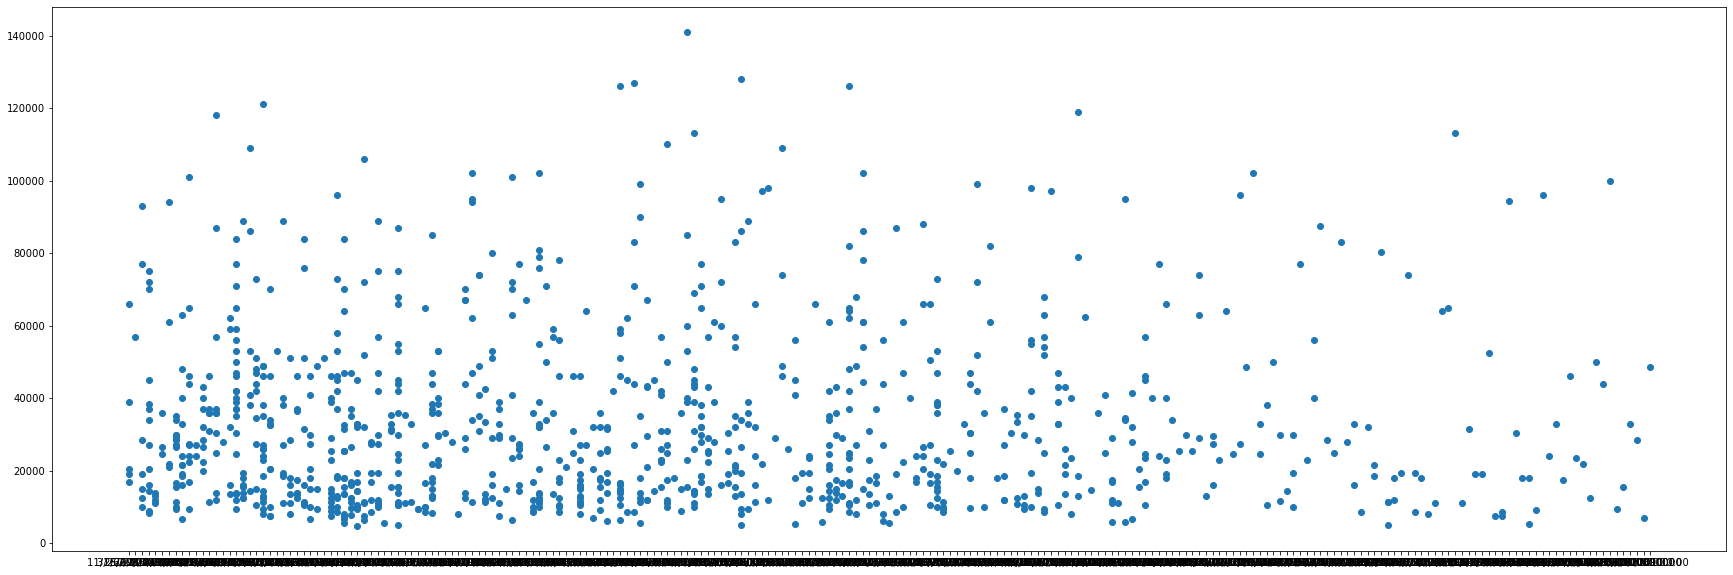

In [284]:
fig,ax=plt.subplots(figsize=(30,10))
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

<AxesSubplot:ylabel='Frequency'>

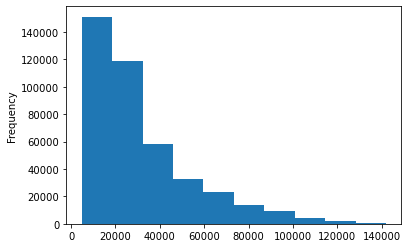

In [285]:
df.SalePrice.plot.hist()

In [286]:
df.saledate[:100]

0     11/16/2006 0:00
1      3/26/2004 0:00
2      2/26/2004 0:00
3      5/19/2011 0:00
4      7/23/2009 0:00
           ...       
95    12/15/2005 0:00
96     1/29/2004 0:00
97     9/18/2008 0:00
98     11/3/2005 0:00
99      6/1/2006 0:00
Name: saledate, Length: 100, dtype: object

### Parsing Dates
When we work with time series data, we want to enrich the time and date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the parse_date parameter

In [287]:
# Import data again but this time parse dates
df=pd.read_csv("data/TrainAndValid.csv",
              low_memory=False,
              parse_dates=["saledate"])

In [288]:
df.saledate[:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

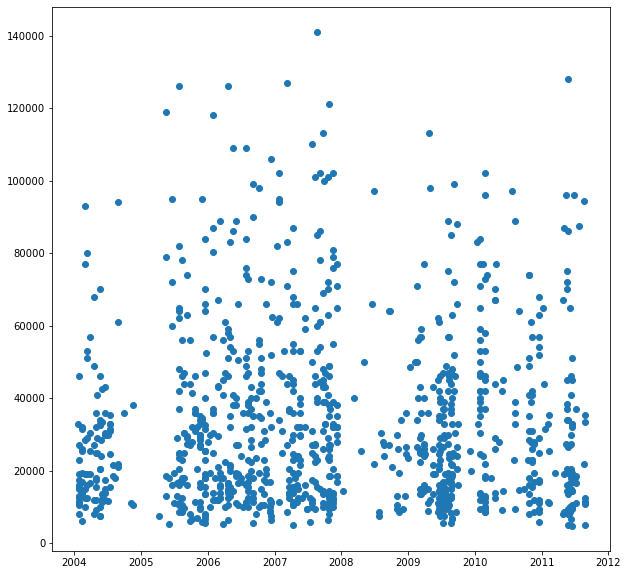

In [289]:
# now plot the saledate and saleprice again
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [290]:
# Numbers of data we have in train nd valid set
len(df)

412698

### Sort the DataFrame in date order

In [291]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [292]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [293]:
# sort the data froam in date order
df.sort_values(by=["saledate"],inplace=True,ascending=True)

In [294]:
df.saledate

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

#### Make a copy of the originnal dataframe

In [295]:
df_tmp=df.copy()

In [296]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


#### Add datetime parameters for saledate olumn

In [297]:
df_tmp["saleyear"]= df_tmp.saledate.dt.year
df_tmp["saleday"] =df_tmp.saledate.dt.day
df_tmp["salemonth"] = df_tmp.saledate.dt.month
df_tmp["saledayofweek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saledayofyear"] = df_tmp.saledate.dt.dayofyear

In [298]:
# Drop the saledate column 
df_tmp.drop("saledate",axis=1,inplace=True)
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


## Modelling 

In [299]:
# Let's build the model
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_jobs=-1,
                           random_state=42 # Used to set random seed
                           )                          

### Convert the string type data into categories (I.e Numvalue)
we can do that by converting them into pandas categories.

We can check the diifferent datatypes compatible with pandas by seeing in pandas change categories documentation.


In [300]:
df_tmp["UsageBand"].isna().sum()

339028

In [301]:
# How to use the pandas api to detect the column is string or not
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [302]:
# FInd the cloumns which contains string
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [303]:
# Now turn these column into category values
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]=content.astype("category").cat.as_ordered()

In [304]:
# Step to check thecodes assign to the obhject type column when converted  into catregory
pd.Categorical(df_tmp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [305]:
pd.Categorical(df_tmp["state"])

['Texas', 'Florida', 'Florida', 'Florida', 'Florida', ..., 'California', 'California', 'California', 'California', 'California']
Length: 412698
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming']

In [306]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [307]:
# Save the preprocessed data and export it to a temporary file
df_tmp.to_csv("data/train_tmp.csv",index =False)

In [308]:
# Reimport the preprocessed data to work on it
df_tmp=pd.read_csv("data/train_tmp.csv",low_memory=False)
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,saleday,salemonth,saledayofweek,saledayofyear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,17,1,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,31,1,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,31,1,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,31,1,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,31,1,1,31


In [309]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

#### Fill missing values

In [310]:
# Filling numerical column first
# Check the column for missing value and fill it with appropriate data
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us that the data for this row was missing in this column
            df_tmp[label+"_is_missing"]=pd.isnull(content)
            # Fiil the missing value in the column with median
            df_tmp[label]=content.fillna(content.median())


In [311]:
# Check if any missing row is there in the numerical columns
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
         if pd.isnull(content).sum():
                print(label)
        

In [312]:
# check to see how many missing values are filled
df_tmp["auctioneerID_is_missing"].value_counts(),df_tmp["MachineHoursCurrentMeter_is_missing"].value_counts()

(False    392562
 True      20136
 Name: auctioneerID_is_missing, dtype: int64,
 True     265194
 False    147504
 Name: MachineHoursCurrentMeter_is_missing, dtype: int64)

In [313]:
# Turn the categorical variables into numbers and fill missing numbers
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add the binary column to indicate whether sample had missing value or not 
        df_tmp[label+"_is_missing"]=pd.isnull(content)
        df_tmp[label]=pd.Categorical(content).codes+1
        ## One is aded becuse pandas by itself assign -1 code to the row which has no value 

In [314]:
# check to see that all column are converted into nueric or not
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

In [315]:
# Check to see if there is still anull value or not
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

### Now that all the data is numeric we will now build a model.

In [316]:
%%time
# this will calulate the total time our model take to work

# Instantiate model
model=RandomForestRegressor(n_jobs=-1,
                           random_state=42)
# Fit the model
model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp['SalePrice'])

CPU times: total: 52min 26s
Wall time: 5min 28s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [317]:
# Score the model
model.score(df_tmp.drop("SalePrice",axis=1),df_tmp['SalePrice'])

0.9875440066186206

In [318]:
df_tmp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6302984,16000.0,1915521,5266,149,99.0,2001,0.0,0,2101,...,True,True,True,True,True,False,False,False,True,True
412694,6324811,6000.0,1919104,19330,149,99.0,2004,0.0,0,240,...,True,True,True,True,True,True,True,True,True,True
412695,6313029,16000.0,1918416,17244,149,99.0,2004,0.0,0,627,...,True,True,True,True,True,True,True,True,True,True
412696,6266251,55000.0,509560,3357,149,99.0,1993,0.0,0,83,...,True,True,True,True,True,True,True,True,True,True


In [319]:
# Split the data into train and valid data set.
df_valid1=df_tmp[df_tmp.saleyear==2012]
df_train=df_tmp[df_tmp.saleyear<=2011]
df_valid=df_valid1[ df_valid1.salemonth<=4]
len(df_valid),len(df_train)

(11573, 401125)

In [320]:
df_train

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6260687,29000.0,1074871,4331,149,2.0,1000,0.0,0,3137,...,True,True,True,True,True,True,True,True,False,False
401121,6312170,11000.0,1812622,9580,149,2.0,2005,0.0,0,4514,...,True,True,True,True,True,True,True,True,True,True
401122,6312727,11000.0,1811599,9580,149,2.0,2005,0.0,0,4514,...,True,True,True,True,True,True,True,True,True,True
401123,6315051,18000.0,1858173,17432,149,2.0,2004,0.0,0,3389,...,True,True,True,True,True,True,True,True,True,True


In [321]:
# Split the data into x and y
x_train,y_train =df_train.drop("SalePrice",axis=1),df_train["SalePrice"]
x_valid,y_valid=df_valid.drop("SalePrice", axis=1),df_valid["SalePrice"]

In [322]:
x_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6260687,1074871,4331,149,2.0,1000,0.0,0,3137,1055,...,True,True,True,True,True,True,True,True,False,False
401121,6312170,1812622,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,True
401122,6312727,1811599,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,True
401123,6315051,1858173,17432,149,2.0,2004,0.0,0,3389,1175,...,True,True,True,True,True,True,True,True,True,True


## Building an evaluation function
 Using RMSLE -- ROOT MEAN SQUARE LoG ERROR

In [323]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error , mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    """
    Calculates root mean squared log error between predictions and true labels.
    
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# Create functions to evaluate model on a few different levels
def show_scores(model):
    model.fit(x_train,y_train)
    train_preds= model.predict(x_train)
    val_preds=model.predict(x_valid)
    scores={"Training MAE":mean_absolute_error(y_train,train_preds),
            "Valid MAE":mean_absolute_error(y_valid,val_preds),
            "Traing RMSLE": rmsle(y_train,train_preds),
            "Valid RMSLE": rmsle(y_valid,val_preds),
            "Training R^2": r2_score(y_train,train_preds),
            "Valid R^2":r2_score(y_valid,val_preds)
           }
    
    return scores

In [324]:
%%time
show_scores(RandomForestRegressor(n_jobs=-1,
                                  random_state=42))

MemoryError: could not allocate 29360128 bytes

In [325]:
x_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6260687,1074871,4331,149,2.0,1000,0.0,0,3137,1055,...,True,True,True,True,True,True,True,True,False,False
401121,6312170,1812622,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,True
401122,6312727,1811599,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,True
401123,6315051,1858173,17432,149,2.0,2004,0.0,0,3389,1175,...,True,True,True,True,True,True,True,True,True,True


### Hyperarameter tuning with RandomizedSearchCv

In [326]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different Random Forest hyperparameter
rf_grid={"n_estimators":np.arange(10,100,1000),
         "max_depth":[None,3,5,10],
         "min_samples_split": np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,10,2),
         "max_features":[0.5,1,"sqrt","auto"]
        }

# Instantiate Randomized search CV
rs_model= RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                             n_iter=2,
                             cv=5,
                             verbose=True)

rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 4min 38s
Wall time: 2min 26s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10])},
                   verbose=True)

In [327]:
# MAking the best model that wee can make on the best parameters of thE randomized search cv
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 10,
 'min_samples_leaf': 7,
 'max_features': 'auto',
 'max_depth': 10}

In [328]:
ideal_model=RandomForestRegressor(n_jobs=-1,
                                  random_state=42,
                                  n_estimators=10,
                                  min_samples_split=14,
                                  min_samples_leaf=7,
                                  max_features=0.5,
                                  max_depth=None
                                 )

show_scores(ideal_model)

{'Training MAE': 3626.272128128233,
 'Valid MAE': 6158.0169222124105,
 'Traing RMSLE': 0.17553003153727365,
 'Valid RMSLE': 0.25108666814142067,
 'Training R^2': 0.9363778077070477,
 'Valid R^2': 0.8706106167776223}

### Now testing our data on the Given test set 

In [329]:
# Import the test data
test_data= pd.read_csv("data/Test.csv",
                      parse_dates=['saledate'])
test_data.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [330]:
## Converting the test dat according to our format of train and valid data to score .
# FUnction for the conversion of data into the required format
def preprocess_data(df):
    """
    Performs the transforation of data and return tarnsfirmed df
    * Converts all the columns / data into numerucal form as ml model can work only on the numeric data
    
    """
    df["saleyear"]= df.saledate.dt.year
    df["salemonth"]=df.saledate.dt.month
    df["saleday"]=df.saledate.dt.day
    df["saledayofweek"]=df.saledate.dt.dayofweek
    df["saledayofyear"]=df.saledate.dt.dayofyear
    
    df.drop("saledate",axis=1,inplace=True)
    
    # Filling numerical column first
    # Check the column for missing value and fill it with appropriate data
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us that the data for this row was missing in this column
                df[label+"_is_missing"]=pd.isnull(content)
                # Fiil the missing value in the column with median
                df[label]=content.fillna(content.median())
    # Turn the categorical variables into numbers and fill missing numbers
    for label,content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            # Add the binary column to indicate whether sample had missing value or not 
            df[label+"_is_missing"]=pd.isnull(content)
            df[label]=pd.Categorical(content).codes+1
            ## One is aded becuse pandas by itself assign -1 code to the row which has no value 
    return df

In [331]:
#Process the test data
test_data=preprocess_data(test_data)
test_data.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [332]:
# Check whether the test_data and x_train data have same column
set(x_train.columns) - set(test_data.columns)

{'auctioneerID_is_missing'}

In [333]:
# MAnually adjust the missing column in the test data set
test_data["auctioneerID_is_missing"]=False
test_data.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True
Steering_Controls_is_missing,True,False,True,True,True


In [334]:
# Now make predicions on the test data
test_preds=ideal_model.predict(test_data)
test_preds

C:\Users\Himanshu Shekhar\python\heart_disease_project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([27701.03386809, 19339.59228884, 51360.48881674, ...,
       11390.47099143, 15008.09196505, 30973.19130431])

In [336]:
# Format the data in the format kaggle is demanding 
df_preds=pd.DataFrame()
df_preds['SalesID']=test_data['SalesID']
df_preds['SalesPrice']=test_preds
df_preds
         

,SalesID,SalesPrice
0,1227829,27701.033868
1,1227844,19339.592289
2,1227847,51360.488817
3,1227848,65996.087947
4,1227863,40610.706914
...,...,...
12452,6643171,38661.938715
12453,6643173,11328.306729
12454,6643184,11390.470991
12455,6643186,15008.091965


## Feature Importance `

In [337]:
df_preds.to_csv("data/test_prediction.csv")

In [338]:
# Find the feature importance of our best model
ideal_model.feature_importances_

array([3.09371637e-02, 1.05435390e-02, 4.43815697e-02, 1.64727006e-03,
       2.44630038e-03, 2.28418635e-01, 2.42316213e-03, 9.43649725e-04,
       3.95189594e-02, 4.16447154e-02, 4.63086931e-02, 4.13030097e-03,
       2.28143996e-02, 1.49245968e-01, 4.43735392e-02, 4.57069015e-03,
       9.96783201e-04, 7.06070768e-04, 5.46531584e-03, 5.53554928e-02,
       2.02718027e-04, 2.04296899e-03, 1.18586264e-03, 1.49640679e-04,
       5.26951832e-04, 9.43352966e-06, 1.32276386e-04, 1.70171984e-02,
       1.82384939e-04, 4.14572519e-05, 1.99128093e-03, 1.96580328e-03,
       1.02596365e-02, 1.27497005e-04, 1.87269589e-04, 1.07926307e-02,
       6.08375367e-04, 1.46394609e-02, 3.45299445e-06, 2.64306411e-07,
       1.26859181e-03, 1.25502996e-03, 8.82969030e-04, 7.40855799e-04,
       1.03426843e-04, 1.78895783e-04, 3.50537136e-04, 2.48393673e-03,
       2.19617039e-03, 1.29150517e-04, 1.90341128e-04, 7.50248955e-02,
       4.27753073e-03, 3.26067902e-03, 2.06112265e-03, 8.15134528e-03,
      

In [351]:
# Plot the feature importance data to make it more visulaisable
def plot_features(columns,importances,n=20):
    df=(pd.DataFrame({"features":columns
                         ,"feature_importances":importances})
       .sort_values("feature_importances",ascending=False)
           .reset_index(drop=True))
        
        # Plot the dataframe
    fig,ax=plt.subplots()
    ax.barh(df["features"][:n],df['feature_importances'][:20])
    ax.set_xlabel("Features")
    ax.set_ylabel("Feature Importance")
    ax.invert_yaxis()

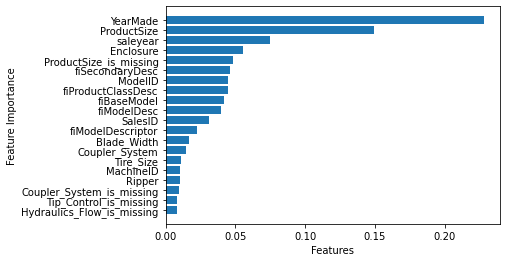

In [352]:
plot_features(x_train.columns,ideal_model.feature_importances_)